# Comparing machine learning models in scikit-learn

### Agenda
- How do I choose which model to use for my supervised learning task?
- How do I choose the best tuning parameters for that model?
- How do I estimate the likely performance of my model on out-of-sample data?

### Review
- Classification task: Predciting the species of an unknown iris
- Used three classification models: KNN(k=1), KNN(k=5), logistic regression
- Need a way to choose between the models

**Solution:** Model evaluation procedures

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on **entire dataset.**
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** resonse values with the **true** values.

In [44]:
import numpy as np
# read the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X(features) and y(response)
X = iris.data
y = iris.target

## Logistic Regression

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the defualt parameter)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X,y)

# predict the response values for the observations in X
logreg.predict(X)

c:\users\van\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

### Classification accuracy
- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [27]:
# compute classification accuracy for the Logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


- Known as **training accuracy** when you train and test the model on the same data

## KNN (K=5)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


## KNN (K=1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


### Problems with training and testing on the same data
- Goal is to estimate likely performace of a model on **out-of-sample**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize 
- Unecessarily complex models **overfit** the training data

## Evaluation procedure #2: Train/test split
1. Split the dataset into two pieces: a **training set** and a **testing set**
2. Train the model on the **training set** 
3. Test the model on the **testing set**, and evaluate how well we did.

In [7]:
# print the shape of the X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [31]:
# Step 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# test_size =0.4 60%-training set, 40%-testing set
# random_state=4 giup generate the same data value each time run train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=4)

What did this accomplish?
  - Model can be trained and tested on **different data**
  - Response values are known for the training set, and thus **predictions can be evaluated**
  - **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [32]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [33]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [34]:
# Step 2: train the model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [35]:
# Step 3: make prediction on the testing set
y_pred = logreg.predict(X_test)

# compare actufrom sklearn import metricsal response values (y_test) with predicted responses values (y_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


### Repeat for KNN with K=5

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


### Repeat for KNN with K=1

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


#### *Conclude Knn with K = 5 and LogisticRegression may have likely better accuracy*

### Can we locate an even better value for K ?

In [40]:
# try k=1 throgh k=25 and record testing accuracy
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)

Text(0, 0.5, 'Testing Accuracy')

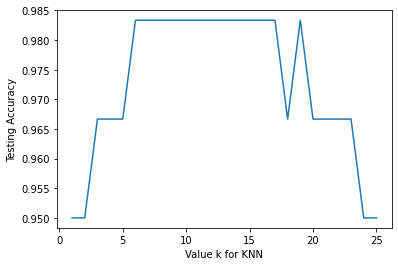

In [43]:
# import matplotlib to plot the testing accuracy (k,accuracy)
import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between k and testing result
plt.plot(k_range,scores)
plt.xlabel('Value k for KNN')
plt.ylabel('Testing Accuracy')

   - **Training accuracy** rises as model complexity increases
   - **Testing accuracy** penalizes models that are too complex or not complex enough
   - For KNN models, complexity is determined by the **value of K** (lower value=more complex)

## Making predictions on out-of-sample data

In [47]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y(not X_train,y_train)
knn.fit(X,y)
# make a prediction for an out-of-sample observation
knn.predict(np.array([3,5,4,2]).reshape(1,-1))

array([1])

## Downside of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy (meaning its depend a lot what in training set and testing set)
- **K-fold cross-validation** overcomes this limitation (by repeating train/test split process mutilple times and averging the result) 
- But, train/test split is sitll useful because of its **flexibility and speed**